<a href="https://colab.research.google.com/github/aayush9753/LearningResources/blob/master/PyTorch/7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [22]:
# 0) Prepare Data
numpy_x,numpy_y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)

In [23]:
#cast to float tensor
X = torch.from_numpy(numpy_x.astype(np.float32))
Y = torch.from_numpy(numpy_y.astype(np.float32))
y = Y.view([Y.shape[0],1])

In [24]:
n_samples , n_features = X.shape


In [25]:
# 1) Model
#linear model : f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

In [26]:
# Loss and Optimizers
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.MSELoss()

In [29]:
# 3)Training Loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  #Backward pass and update
  loss.backward()
  optimizer.step()

  # zero grad before new step
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'Loss = {loss:0.4f} Epoch = {epoch+1}')

Loss = 4052.4617 Epoch = 10
Loss = 2857.7297 Epoch = 20
Loss = 2042.7209 Epoch = 30
Loss = 1486.6375 Epoch = 40
Loss = 1107.1460 Epoch = 50
Loss = 848.1177 Epoch = 60
Loss = 671.2809 Epoch = 70
Loss = 550.5340 Epoch = 80
Loss = 468.0711 Epoch = 90
Loss = 411.7447 Epoch = 100


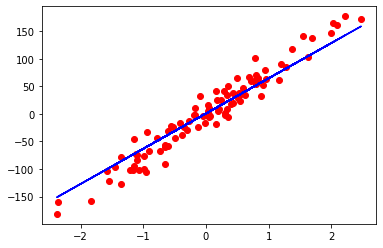

In [33]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(numpy_x, numpy_y, 'ro')
plt.plot(numpy_x, predicted, 'b')
plt.show()